# SOM(Self-organizing maps)

https://somoclu.readthedocs.io/en/stable/

In [1]:
import os
import numpy as np
import pandas as pd
import japanize_matplotlib
import matplotlib.pyplot as plt
from somoclu import Somoclu

In [2]:
# -1〜+1の間に規格化 :ToDo
def normalize(score):
    norm = (score-score.min())/(score.max()-score.min()) # 0-1に規格化
    norm = norm * 2
    norm = norm - np.mean(norm, axis=0)
    return norm

In [3]:
# 使うデータは1036冊分の小説データの感情スコア値
SCORE_PATH = 'data/all_score_0630.csv'
TARGET_PATH = 'data/target2.csv'

In [4]:
# スコアファイル読み込み
score_df = pd.read_csv(SCORE_PATH, index_col=0)
score_df.head()

,S00,S01,S02,S03,S04,S05,S06,S07,S08,S09,...,S90,S91,S92,S93,S94,S95,S96,S97,S98,S99
13,0.791536,0.737968,0.829343,0.794293,0.724665,0.707668,0.620669,0.607199,0.584499,0.626389,...,0.754139,0.782878,0.784226,0.576965,0.534152,0.601299,0.612696,0.611167,0.664706,0.736535
24,0.749562,0.727724,0.721075,0.648729,0.764811,0.627247,0.634754,0.640822,0.792777,0.844474,...,0.690379,0.640809,0.828280,0.806064,0.754045,0.906671,0.896347,0.869153,0.901117,0.933473
30,0.473785,0.473785,0.652944,0.622040,0.663769,0.799352,0.982744,0.966812,0.851591,0.907304,...,0.101549,0.142406,0.285570,0.270750,0.320434,0.441094,0.464494,0.548101,0.610829,0.517892
41,0.900899,0.952689,1.000000,0.928408,0.802310,0.760143,0.699925,0.759109,0.660739,0.726829,...,0.094422,0.246499,0.291265,0.373439,0.445357,0.450839,0.390509,0.337263,0.402609,0.459209
47,0.742317,0.836033,0.890097,0.911625,0.967501,0.967501,0.972570,0.982321,1.000000,0.929571,...,0.202141,0.256933,0.256933,0.243298,0.175068,0.204548,0.171354,0.173879,0.108680,0.023454


In [5]:
# ターゲットファイル読み込み
target_df = pd.read_csv(TARGET_PATH, index_col=0)
target_df.head(2)

,対象,人物ID,氏名,読み,作品ID,作品名,副題,作品名読み,図書カードURL,テキストファイルURL,テキストファイルパス,スコアファイルパス,備考,length
0,True,374,饗庭 篁村,あえば こうそん,45754,良夜,NaN,りょうや,https://www.aozora.gr.jp/cards/000374/card4575...,https://www.aozora.gr.jp/cards/000374/files/45...,./bunko/cards/000374/files/edit/45754_ruby_236...,./bunko/cards/000374/files/score/45754_ruby_23...,NaN,119.0
1,True,879,芥川 竜之介,あくたがわ りゅうのすけ,73,或敵打の話,NaN,あるかたきうちのはなし,https://www.aozora.gr.jp/cards/000879/card73.html,https://www.aozora.gr.jp/cards/000879/files/73...,./bunko/cards/000879/files/edit/73_ruby_1217.txt,./bunko/cards/000879/files/score/73_ruby_1217.txt,NaN,280.0


In [6]:
# ターゲットファイルとスコアファイルをマージ
df_merge_all = pd.merge(target_df, score_df, left_index=True, right_index=True)
df_merge_all.head(3)

,対象,人物ID,氏名,読み,作品ID,作品名,副題,作品名読み,図書カードURL,テキストファイルURL,...,S90,S91,S92,S93,S94,S95,S96,S97,S98,S99
13,True,879,芥川 竜之介,あくたがわ りゅうのすけ,124,お律と子等と,NaN,おりつとこらと,https://www.aozora.gr.jp/cards/000879/card124....,https://www.aozora.gr.jp/cards/000879/files/12...,...,0.754139,0.782878,0.784226,0.576965,0.534152,0.601299,0.612696,0.611167,0.664706,0.736535
24,True,879,芥川 竜之介,あくたがわ りゅうのすけ,77,奇怪な再会,NaN,きかいなさいかい,https://www.aozora.gr.jp/cards/000879/card77.html,https://www.aozora.gr.jp/cards/000879/files/77...,...,0.690379,0.640809,0.828280,0.806064,0.754045,0.906671,0.896347,0.869153,0.901117,0.933473
30,True,879,芥川 竜之介,あくたがわ りゅうのすけ,38,戯作三昧,NaN,げさくざんまい,https://www.aozora.gr.jp/cards/000879/card38.html,https://www.aozora.gr.jp/cards/000879/files/38...,...,0.101549,0.142406,0.285570,0.270750,0.320434,0.441094,0.464494,0.548101,0.610829,0.517892


In [7]:
# Indexを列として出して，振り直し
df_merge = df_merge_all.reset_index()
df_merge = df_merge.rename(columns={'index': 'TargetID'})
df_merge.head()

,TargetID,対象,人物ID,氏名,読み,作品ID,作品名,副題,作品名読み,図書カードURL,...,S90,S91,S92,S93,S94,S95,S96,S97,S98,S99
0,13,True,879,芥川 竜之介,あくたがわ りゅうのすけ,124,お律と子等と,NaN,おりつとこらと,https://www.aozora.gr.jp/cards/000879/card124....,...,0.754139,0.782878,0.784226,0.576965,0.534152,0.601299,0.612696,0.611167,0.664706,0.736535
1,24,True,879,芥川 竜之介,あくたがわ りゅうのすけ,77,奇怪な再会,NaN,きかいなさいかい,https://www.aozora.gr.jp/cards/000879/card77.html,...,0.690379,0.640809,0.828280,0.806064,0.754045,0.906671,0.896347,0.869153,0.901117,0.933473
2,30,True,879,芥川 竜之介,あくたがわ りゅうのすけ,38,戯作三昧,NaN,げさくざんまい,https://www.aozora.gr.jp/cards/000879/card38.html,...,0.101549,0.142406,0.285570,0.270750,0.320434,0.441094,0.464494,0.548101,0.610829,0.517892
3,41,True,879,芥川 竜之介,あくたがわ りゅうのすけ,59,邪宗門,NaN,じゃしゅうもん,https://www.aozora.gr.jp/cards/000879/card59.html,...,0.094422,0.246499,0.291265,0.373439,0.445357,0.450839,0.390509,0.337263,0.402609,0.459209
4,47,True,879,芥川 竜之介,あくたがわ りゅうのすけ,155,少年,NaN,しょうねん,https://www.aozora.gr.jp/cards/000879/card155....,...,0.202141,0.256933,0.256933,0.243298,0.175068,0.204548,0.171354,0.173879,0.108680,0.023454


In [8]:
scores = df_merge.loc[:,'S00':].to_numpy()
# scores = score_df.to_numpy()

In [9]:
# 平均値を０にしておく(-1〜1の間に規格化)
A = normalize(scores)
# A = scores - scores.mean(axis=0)
A.shape, np.min(A), np.max(A), np.mean(A)

((1036, 100), -1.1071332471188664, 1.0698986010803475, -4.020807710804621e-18)

In [10]:
som = Somoclu(n_rows=8, n_columns=6, verbose=2)
som.train(A, 1000)

      1% [=                                                 ]
      2% [==                                                ]
      3% [==                                                ]
      4% [===                                               ]
      5% [===                                               ]
      6% [====                                              ]
      7% [====                                              ]
      8% [=====                                             ]
      9% [=====                                             ]
     11% [======                                            ]
     12% [=======                                           ]
     13% [=======                                           ]
     14% [========                                          ]
     15% [========                                          ]
     16% [=========                                         ]
     17% [=========                                         ]
     18%

Time for epoch 1: 0.001108 Time for epoch 2: 0.0007951 Time for epoch 3: 0.000807 Time for epoch 4: 0.0007961 Time for epoch 5: 0.000797 Time for epoch 6: 0.0008929 Time for epoch 7: 0.000814 Time for epoch 8: 0.002908 Time for epoch 9: 0.0008409 Time for epoch 10: 0.0008869 Time for epoch 11: 0.0008149 Time for epoch 12: 0.0008159 Time for epoch 13: 0.0008168 Time for epoch 14: 0.0008209 Time for epoch 15: 0.0008209 Time for epoch 16: 0.000819 Time for epoch 17: 0.0008199 Time for epoch 18: 0.0008259 Time for epoch 19: 0.0008199 Time for epoch 20: 0.0008299 Time for epoch 21: 0.0008209 Time for epoch 22: 0.0008209 Time for epoch 23: 0.0008209 Time for epoch 24: 0.001073 Time for epoch 25: 0.0008001 Time for epoch 26: 0.000809 Time for epoch 27: 0.0008008 Time for epoch 28: 0.000803 Time for epoch 29: 0.000802 Time for epoch 30: 0.0008001 Time for epoch 31: 0.0008001 Time for epoch 32: 0.0008039 Time for epoch 33: 0.0007999 Time for epoch 34: 0.000802 Time for epoch 35: 0.0007999 Time 

In [12]:
y = [x for x in range(A.shape[0])]
len(y)

1036

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.8/dist-packages/matplotlib/pyplot.py'>

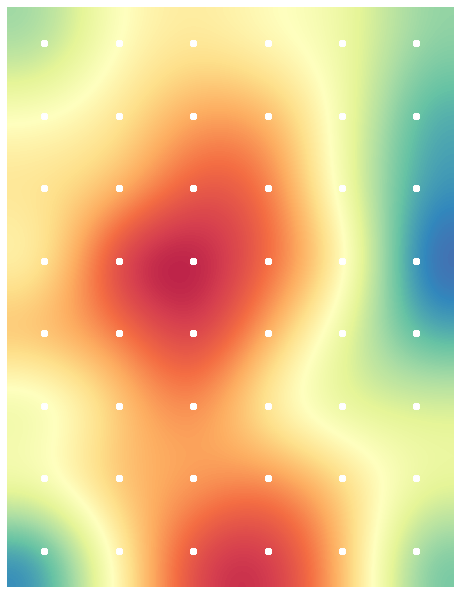

In [11]:
som.view_umatrix(bestmatches=True, filename='umatrix.png')

In [1]:
# どう見ればよいのか判断が難しい．．